In [2]:
#loading libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
#loading train and test data seperately and cleaning them
train = pd.read_excel('Data_Train.xlsx')
test = pd.read_excel('Data_Test.xlsx')

In [4]:
print('Shape of train data is :', train.shape , '\n' , 'shape of test data is :', test.shape)

Shape of train data is : (12690, 9) 
 shape of test data is : (4231, 8)


In [5]:
#1st I will clean and work on train data.
train.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


here I will 1st work on Title column, as I can see that there are comma seperated values, I will check what are the 
mximum number of values seperated by comma, and then for each value I will create a new column.

In [6]:
#we know that minimum value is 1, so setting it one for our loop 
max_val = 1
for i in list(train['TITLE']):
    if len(i.split(',')) > max_val:
        max_val = len(i.split(','))
        
print(max_val)

2


we can see that the maximum values seperated by comma is 2, so I will be creating only 2 seperate columns for Title

In [7]:
train['Title 1']=train['TITLE'].str.rsplit(',',1).str.get(0)
train['Title 2']=train['TITLE'].str.rsplit(',',1).str.get(1)

In [8]:
train.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,Title 1,Title 2
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200,CASUAL DINING,NaN
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500,CASUAL DINING,BAR
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800,CASUAL DINING,NaN
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800,QUICK BITES,NaN
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300,DESSERT PARLOR,NaN


In [9]:
#now working on cuisines
#checking the max number of Cuisine available
#we know that minimum value is 1, so setting it one for our loop 
max_val_cuisine = 1
for i in list(train['CUISINES']):
    if len(i.split(',')) > max_val_cuisine:
        max_val_cuisine = len(i.split(','))
        
print(max_val_cuisine)

8


we get the maximum number of cuisine is 8, So there will be 8 indivisual column for cousine 

In [10]:
train['C 1']=train['CUISINES'].str.rsplit(',').str.get(0)
train['C 2']=train['CUISINES'].str.rsplit(',').str.get(1)
train['C 3']=train['CUISINES'].str.rsplit(',').str.get(2)
train['C 4']=train['CUISINES'].str.rsplit(',').str.get(3)
train['C 5']=train['CUISINES'].str.rsplit(',').str.get(4)
train['C 6']=train['CUISINES'].str.rsplit(',').str.get(5)
train['C 7']=train['CUISINES'].str.rsplit(',').str.get(6)
train['C 8']=train['CUISINES'].str.rsplit(',').str.get(7)

In [11]:
train.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,Title 1,Title 2,C 1,C 2,C 3,C 4,C 5,C 6,C 7,C 8
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200,CASUAL DINING,NaN,Malwani,Goan,North Indian,NaN,NaN,NaN,NaN,NaN
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500,CASUAL DINING,BAR,Asian,Modern Indian,Japanese,NaN,NaN,NaN,NaN,NaN
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800,CASUAL DINING,NaN,North Indian,Chinese,Biryani,Hyderabadi,NaN,NaN,NaN,NaN
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800,QUICK BITES,NaN,Tibetan,Chinese,NaN,NaN,NaN,NaN,NaN,NaN
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300,DESSERT PARLOR,NaN,Desserts,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#now I will work on Votes column, I will simply strip the values by ( votes) so that we will be left with 
#numeric values only.
train['VOTES'] = train['VOTES'].str.strip(' votes')

In [13]:
train.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,Title 1,Title 2,C 1,C 2,C 3,C 4,C 5,C 6,C 7,C 8
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49,1200,CASUAL DINING,NaN,Malwani,Goan,North Indian,NaN,NaN,NaN,NaN,NaN
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30,1500,CASUAL DINING,BAR,Asian,Modern Indian,Japanese,NaN,NaN,NaN,NaN,NaN
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221,800,CASUAL DINING,NaN,North Indian,Chinese,Biryani,Hyderabadi,NaN,NaN,NaN,NaN
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24,800,QUICK BITES,NaN,Tibetan,Chinese,NaN,NaN,NaN,NaN,NaN,NaN
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165,300,DESSERT PARLOR,NaN,Desserts,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#now I will follow the same steps for our test data and clean it.

In [15]:
#for TITLE COLUMN
test['Title 1']=test['TITLE'].str.rsplit(',',1).str.get(0)
test['Title 2']=test['TITLE'].str.rsplit(',',1).str.get(1)

In [16]:
#for Cuisine column
test['C 1']=test['CUISINES'].str.rsplit(',').str.get(0)
test['C 2']=test['CUISINES'].str.rsplit(',').str.get(1)
test['C 3']=test['CUISINES'].str.rsplit(',').str.get(2)
test['C 4']=test['CUISINES'].str.rsplit(',').str.get(3)
test['C 5']=test['CUISINES'].str.rsplit(',').str.get(4)
test['C 6']=test['CUISINES'].str.rsplit(',').str.get(5)
test['C 7']=test['CUISINES'].str.rsplit(',').str.get(6)
test['C 8']=test['CUISINES'].str.rsplit(',').str.get(7)

In [17]:
#for VOTE column
#now I will work on Votes column, I will simply strip the values by ( votes) so that we will be left with 
#numeric values only.
test['VOTES'] = test['VOTES'].str.strip(' votes')

In [18]:
test.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,Title 1,Title 2,C 1,C 2,C 3,C 4,C 5,C 6,C 7,C 8
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564,CASUAL DINING,NaN,North Indian,Chinese,Mughlai,Kebab,NaN,NaN,NaN,NaN
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61,QUICK BITES,NaN,South Indian,Fast Food,Pizza,North Indian,NaN,NaN,NaN,NaN
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350,CASUAL DINING,NaN,North Indian,Seafood,Biryani,Chinese,NaN,NaN,NaN,NaN
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445,None,NaN,Biryani,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23,QUICK BITES,NaN,South Indian,Kerala,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
test['TITLE'].value_counts()

QUICK BITES                     1416
CASUAL DINING                   1258
None                             284
CAFÉ                             223
DESSERT PARLOR                   126
CASUAL DINING,BAR                114
FINE DINING                       98
BAKERY                            90
BEVERAGE SHOP                     60
BAR,CASUAL DINING                 47
LOUNGE                            38
BAKERY,QUICK BITES                34
BAR                               33
FOOD COURT                        32
SWEET SHOP                        23
SWEET SHOP,QUICK BITES            22
KIOSK                             20
PUB                               17
DHABA                             16
MESS                              15
CAFÉ,BAKERY                       14
QUICK BITES,SWEET SHOP            14
CAFÉ,QUICK BITES                  12
BEVERAGE SHOP,QUICK BITES         12
PUB,CASUAL DINING                 12
CAFÉ,CASUAL DINING                12
QUICK BITES,BAKERY                11
B

In [20]:
#analyzing train data
train.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,Title 1,Title 2,C 1,C 2,C 3,C 4,C 5,C 6,C 7,C 8
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49,1200,CASUAL DINING,NaN,Malwani,Goan,North Indian,NaN,NaN,NaN,NaN,NaN
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30,1500,CASUAL DINING,BAR,Asian,Modern Indian,Japanese,NaN,NaN,NaN,NaN,NaN
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221,800,CASUAL DINING,NaN,North Indian,Chinese,Biryani,Hyderabadi,NaN,NaN,NaN,NaN
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24,800,QUICK BITES,NaN,Tibetan,Chinese,NaN,NaN,NaN,NaN,NaN,NaN
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165,300,DESSERT PARLOR,NaN,Desserts,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
#checking missing values
train.isnull().sum()

TITLE                0
RESTAURANT_ID        0
CUISINES             0
TIME                 0
CITY               112
LOCALITY            98
RATING               2
VOTES             1204
COST                 0
Title 1              0
Title 2          11208
C 1                  0
C 2               3062
C 3               6999
C 4               9995
C 5              11675
C 6              12276
C 7              12514
C 8              12613
dtype: int64

in cuising type, I will be filling none where there are NaN values and same in Title 2, in Votes I will be filling 0, We will check Rating column again, as there are some values named as NEW, and will drop the missing observation of CITY and LOCALITY

In [22]:
train['C 1'].fillna('none',inplace=True)
train['C 2'].fillna('none',inplace=True)
train['C 3'].fillna('none',inplace=True)
train['C 4'].fillna('none',inplace=True)
train['C 5'].fillna('none',inplace=True)
train['C 6'].fillna('none',inplace=True)
train['C 7'].fillna('none',inplace=True)
train['C 8'].fillna('none',inplace=True)

In [23]:
train['Title 1'].fillna('none',inplace=True)
train['Title 2'].fillna('none',inplace=True)

In [24]:
#checking Ratings column

train['RATING'].value_counts()

3.9    1238
3.8    1190
4.0    1099
3.7    1086
3.6     951
4.1     936
3.5     771
4.2     723
NEW     707
3.4     575
4.3     556
-       495
3.3     365
4.4     362
3.2     266
4.5     199
3.1     186
2.9     186
3.0     170
2.8     146
4.6     141
2.7      89
4.7      69
2.6      61
2.5      35
4.8      32
4.9      22
2.4      15
2.3      10
2.1       3
2.0       2
2.2       2
Name: RATING, dtype: int64

In [25]:
#I will be converting this NEW and - into 0
train.loc[train['RATING'] == 'NEW', 'RATING'] = 0
train.loc[train['RATING'] == '-', 'RATING'] = 0

In [26]:
#checking for VOTE, I will impute 0 inplace of NaN
train['VOTES'].fillna(0,inplace=True)

In [27]:
#now checking missing values
train.isnull().sum()

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY             112
LOCALITY          98
RATING             2
VOTES              0
COST               0
Title 1            0
Title 2            0
C 1                0
C 2                0
C 3                0
C 4                0
C 5                0
C 6                0
C 7                0
C 8                0
dtype: int64

Now I will be dropping the above observations having missing values.

In [28]:
train_new = train.dropna()

In [29]:
train_new.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
COST             0
Title 1          0
Title 2          0
C 1              0
C 2              0
C 3              0
C 4              0
C 5              0
C 6              0
C 7              0
C 8              0
dtype: int64

In [30]:
#now checking missing value for test data set
test.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY               35
LOCALITY           30
RATING              2
VOTES             402
Title 1             0
Title 2          3769
C 1                 0
C 2               985
C 3              2331
C 4              3314
C 5              3875
C 6              4094
C 7              4157
C 8              4200
dtype: int64

In [31]:
test['C 1'].fillna('none',inplace=True)
test['C 2'].fillna('none',inplace=True)
test['C 3'].fillna('none',inplace=True)
test['C 4'].fillna('none',inplace=True)
test['C 5'].fillna('none',inplace=True)
test['C 6'].fillna('none',inplace=True)
test['C 7'].fillna('none',inplace=True)
test['C 8'].fillna('none',inplace=True)

In [32]:
test['Title 1'].fillna('none',inplace=True)
test['Title 2'].fillna('none',inplace=True)

In [33]:
test['RATING'].value_counts()

3.8    414
3.9    405
4.0    399
3.7    351
3.6    310
4.1    281
4.2    245
NEW    223
3.5    217
3.4    202
4.3    184
-      177
4.4    122
3.3    120
3.2     83
3.1     77
4.5     75
3.0     59
2.9     56
2.8     45
4.6     43
2.7     40
2.6     24
4.7     21
4.8     17
2.5     16
2.4      9
4.9      6
2.3      5
2.2      2
2.1      1
Name: RATING, dtype: int64

In [34]:
#I will be converting this NEW and - into 0
test.loc[test['RATING'] == 'NEW', 'RATING'] = 0
test.loc[test['RATING'] == '-', 'RATING'] = 0

In [35]:
#checking for VOTE, I will impute 0 inplace of NaN
test['VOTES'].fillna(0,inplace=True)

In [36]:
test.isnull().sum()

TITLE             0
RESTAURANT_ID     0
CUISINES          0
TIME              0
CITY             35
LOCALITY         30
RATING            2
VOTES             0
Title 1           0
Title 2           0
C 1               0
C 2               0
C 3               0
C 4               0
C 5               0
C 6               0
C 7               0
C 8               0
dtype: int64

In [37]:
test_new = test.dropna()

In [38]:
test_new.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
Title 1          0
Title 2          0
C 1              0
C 2              0
C 3              0
C 4              0
C 5              0
C 6              0
C 7              0
C 8              0
dtype: int64

In [39]:
#now we have cleaned our both train and test data and worked on missing value.

In [40]:
#removing of columns which are not needed in train and test
train_new.drop(['TITLE','RESTAURANT_ID','TIME'],axis=1,inplace=True)
test_new.drop(['TITLE','RESTAURANT_ID','TIME'],axis=1,inplace=True)

In [41]:
train_new.drop(['CUISINES'],axis=1,inplace=True)
test_new.drop(['CUISINES'],axis=1,inplace=True)

# Exploring train_new data

In [42]:
train_new.head()

,CITY,LOCALITY,RATING,VOTES,COST,Title 1,Title 2,C 1,C 2,C 3,C 4,C 5,C 6,C 7,C 8
0,Thane,Dombivali East,3.6,49,1200,CASUAL DINING,none,Malwani,Goan,North Indian,none,none,none,none,none
1,Chennai,Ramapuram,4.2,30,1500,CASUAL DINING,BAR,Asian,Modern Indian,Japanese,none,none,none,none,none
2,Chennai,Saligramam,3.8,221,800,CASUAL DINING,none,North Indian,Chinese,Biryani,Hyderabadi,none,none,none,none
3,Mumbai,Bandra West,4.1,24,800,QUICK BITES,none,Tibetan,Chinese,none,none,none,none,none,none
4,Mumbai,Lower Parel,3.8,165,300,DESSERT PARLOR,none,Desserts,none,none,none,none,none,none,none


In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          12690 non-null  object
 8   COST           12690 non-null  int64 
 9   Title 1        12690 non-null  object
 10  Title 2        12690 non-null  object
 11  C 1            12690 non-null  object
 12  C 2            12690 non-null  object
 13  C 3            12690 non-null  object
 14  C 4            12690 non-null  object
 15  C 5            12690 non-null  object
 16  C 6            12690 non-null  object
 17  C 7            12690 non-null  object
 18  C 8            12690 non-n

In [44]:
#changing Ratings and Votes into numeric columns
train_new['RATING']=pd.to_numeric(train_new['RATING'])

In [45]:
train_new['VOTES'] = pd.to_numeric(train_new['VOTES'])

In [46]:
train_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12575 entries, 0 to 12689
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CITY      12575 non-null  object 
 1   LOCALITY  12575 non-null  object 
 2   RATING    12575 non-null  float64
 3   VOTES     12575 non-null  int64  
 4   COST      12575 non-null  int64  
 5   Title 1   12575 non-null  object 
 6   Title 2   12575 non-null  object 
 7   C 1       12575 non-null  object 
 8   C 2       12575 non-null  object 
 9   C 3       12575 non-null  object 
 10  C 4       12575 non-null  object 
 11  C 5       12575 non-null  object 
 12  C 6       12575 non-null  object 
 13  C 7       12575 non-null  object 
 14  C 8       12575 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.5+ MB


we have 3 numeric column COST,Rating and Votes  I will use label encoding for other object columns

In [47]:
train_new.describe()

,RATING,VOTES,COST
count,12575.000000,12575.000000,12575.000000
mean,3.428573,377.801511,656.206839
std,1.175131,813.938952,628.564328
min,0.000000,0.000000,20.000000
25%,3.400000,40.000000,300.000000
50%,3.800000,133.000000,500.000000
75%,4.000000,406.000000,800.000000
max,4.900000,41186.000000,14000.000000


we can see that in cost column, minimum cost is 20 and maximum is 14000,the COST is right skewed, we will look at it graphically, Rating is max at 4.9 minimum is 0, and Votes also shows a right skewed data

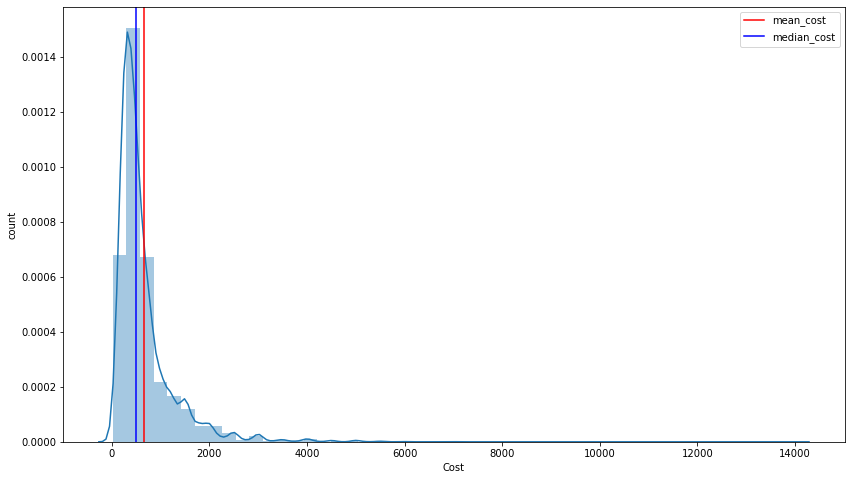

In [48]:
plt.figure(figsize=(14,8))
sns.distplot(train_new['COST'])
plt.axvline(np.mean(train_new['COST']),color='red',label='mean_cost')
plt.axvline(np.median(train_new['COST']),color='blue',label='median_cost')
plt.xlabel('Cost')
plt.ylabel('count')
plt.legend()
plt.show()

In [49]:
np.mean(train_new['COST'])

656.2068389662028

from the above graph we can see that the cost is very highly right skewed, avg cost is 656.2068389662028

# BIVARIATE ANALYSIS

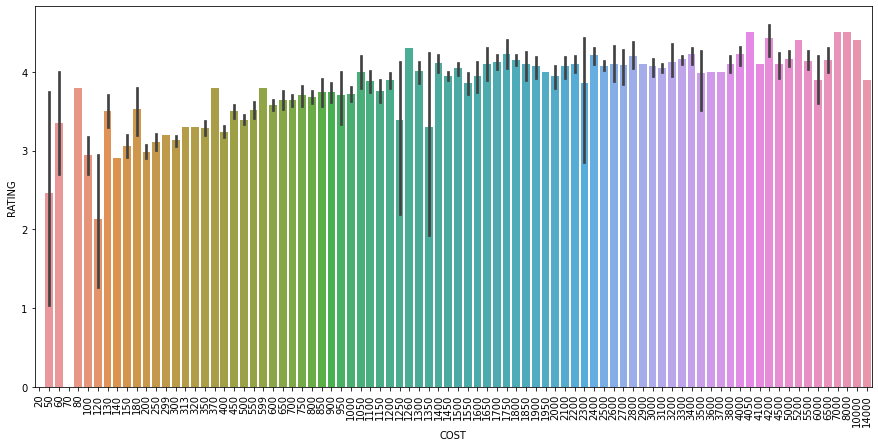

In [50]:
#comparing avg price with avg ratings
plt.figure(figsize=(15,7))
sns.barplot(x=train_new['COST'],y=train_new['RATING'])
plt.xticks(rotation=90)
plt.show()

here we can see an increasing patter, as the rating increases the cost is also increasing.

In [51]:
#CHECKING STATE WISE AVG COST
train_new.groupby('CITY').mean().reset_index().sort_values('COST',ascending=False)

,CITY,RATING,VOTES,COST
46,Banglaore,4.400000,758.000000,3000.000000
79,Chennai Thousand Lights,4.300000,237.000000,2500.000000
164,Kerala 682304,4.200000,125.000000,2200.000000
78,Chennai Teynampet,3.966667,164.333333,2166.666667
329,Ulsoo,4.100000,129.000000,2000.000000
207,Malleshwaram Bangalore,4.900000,2069.000000,2000.000000
74,Chennai Mahabalipuram,3.700000,90.000000,1850.000000
122,Gurgoan,4.300000,90.000000,1800.000000
169,Khar (west),4.000000,1027.000000,1700.000000
116,Grant Road West,4.000000,557.000000,1600.000000


#from above data set, we can see that in banglore avg cost is highest as compared to the cost in other cities.

<AxesSubplot:xlabel='RATING', ylabel='VOTES'>

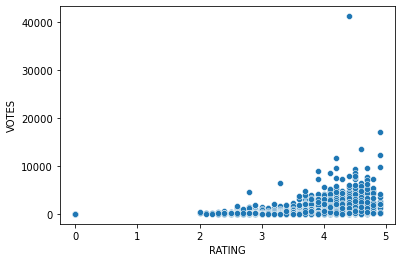

In [52]:
#checking relation between votes and rating

sns.scatterplot(x=train_new['RATING'],y=train_new['VOTES'])

here also we see a positive relation between rating and votes, as one increases other also increases

# LABEL ENCODING

In [53]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [54]:
#Encoding Title1 and Title2
train_new['Title 1'] = le.fit_transform(train_new['Title 1'])
train_new['Title 2'] = le.fit_transform(train_new['Title 2'])

#encoding C 1,C 2,C 3,...C 8
train_new['C 1'] = le.fit_transform(train_new['C 1'])
train_new['C 2'] = le.fit_transform(train_new['C 2'])
train_new['C 3'] = le.fit_transform(train_new['C 3'])
train_new['C 4'] = le.fit_transform(train_new['C 4'])
train_new['C 5'] = le.fit_transform(train_new['C 5'])
train_new['C 6'] = le.fit_transform(train_new['C 6'])
train_new['C 7'] = le.fit_transform(train_new['C 7'])
train_new['C 8'] = le.fit_transform(train_new['C 8'])

In [55]:
#encoding CITY AND LOCALITY
train_new['CITY'] = le.fit_transform(train_new['CITY'])
train_new['LOCALITY'] = le.fit_transform(train_new['LOCALITY'])

In [56]:
train_new.head()

,CITY,LOCALITY,RATING,VOTES,COST,Title 1,Title 2,C 1,C 2,C 3,C 4,C 5,C 6,C 7,C 8
0,319,285,3.6,49,1200,4,19,59,32,66,85,78,69,47,18
1,67,1044,4.2,30,1500,4,1,6,60,41,85,78,69,47,18
2,67,1099,3.8,221,800,4,19,72,23,12,32,78,69,47,18
3,221,136,4.1,24,800,21,19,100,23,93,85,78,69,47,18
4,221,620,3.8,165,300,8,19,28,98,93,85,78,69,47,18


# CHECKING FOR OUTLIERS


In [57]:
from scipy.stats import zscore
z = np.abs(zscore(train_new))

In [58]:
threshold = 3
print(np.where(z>3))

(array([    1,     6,    11, ..., 12553, 12559, 12571], dtype=int64), array([ 6, 11,  6, ..., 13,  6,  6], dtype=int64))


In [59]:
train_after_out =train_new[(z<3).all(axis = 1)]
print('shape after deleting outliers :' , train_after_out.shape)
print('shape before outliers :' , train_new.shape)

shape after deleting outliers : (10750, 15)
shape before outliers : (12575, 15)


# splitting into inputs and output

In [60]:
X = train_after_out.drop('COST',axis=1)
Y = train_after_out['COST']

In [61]:
X.head()

,CITY,LOCALITY,RATING,VOTES,Title 1,Title 2,C 1,C 2,C 3,C 4,C 5,C 6,C 7,C 8
0,319,285,3.6,49,4,19,59,32,66,85,78,69,47,18
2,67,1099,3.8,221,4,19,72,23,12,32,78,69,47,18
3,221,136,4.1,24,21,19,100,23,93,85,78,69,47,18
4,221,620,3.8,165,8,19,28,98,93,85,78,69,47,18
5,221,1358,4.0,550,4,19,72,23,78,11,78,69,47,18


In [62]:
X.loc[X['RATING']=='-']

,CITY,LOCALITY,RATING,VOTES,Title 1,Title 2,C 1,C 2,C 3,C 4,C 5,C 6,C 7,C 8


In [63]:
Y.head()

0    1200
2     800
3     800
4     300
5     800
Name: COST, dtype: int64

# SCALING INPUTS

In [64]:
# I will be using MINMAX scaler for scaling the input variables
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

In [65]:
X = mms.fit_transform(X)
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.893557,0.201841,0.734694,0.017450,0.181818,1.0,0.572816,0.326531,0.709677,1.000000,1.0,1.0,1.0,0.0
1,0.187675,0.778329,0.775510,0.078704,0.181818,1.0,0.699029,0.234694,0.129032,0.302632,1.0,1.0,1.0,0.0
2,0.619048,0.096317,0.836735,0.008547,0.954545,1.0,0.970874,0.234694,1.000000,1.000000,1.0,1.0,1.0,0.0
3,0.619048,0.439093,0.775510,0.058761,0.363636,1.0,0.271845,1.000000,1.000000,1.000000,1.0,1.0,1.0,0.0
4,0.619048,0.961756,0.816327,0.195869,0.181818,1.0,0.699029,0.234694,0.838710,0.026316,1.0,1.0,1.0,0.0


In [66]:
#as this is a regression type problem as we need to predict the cont variable (COST), I will be using Linear regression,
# gradiant bossting regression, random forest regression

#importing libraries
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score

In [67]:
#CROSS VALIDATION OF DATA

#checking cross validation
models = [LinearRegression(),GradientBoostingRegressor(),RandomForestRegressor(),Lasso(),Ridge(),ElasticNet(),DecisionTreeRegressor()]

for model in models:
    print("model name =",model)
    model.scores = cross_val_score(model, X, Y, cv=10)
    print('Model scores :',model.scores)
    print('Model mean score: ',model.scores.mean())
    print('Model std score :', model.scores.std())
    print('\n')

model name = LinearRegression()
Model scores : [0.27201086 0.21824868 0.24950246 0.26496123 0.25668678 0.27697586
 0.22076352 0.2774836  0.23129041 0.29033474]
Model mean score:  0.25582581494232554
Model std score : 0.02395157368100818


model name = GradientBoostingRegressor()
Model scores : [0.62736544 0.59985172 0.56579392 0.60242281 0.61966286 0.60801912
 0.61303575 0.64409375 0.63873332 0.65466623]
Model mean score:  0.6173644910411217
Model std score : 0.02441997180692759


model name = RandomForestRegressor()
Model scores : [0.64407159 0.65040027 0.56785781 0.64991423 0.64681699 0.63099812
 0.63974111 0.64508467 0.69386691 0.67351549]
Model mean score:  0.6442267187709849
Model std score : 0.030703807262899847


model name = Lasso()
Model scores : [0.268878   0.21556957 0.2516023  0.2664284  0.25716759 0.27451675
 0.22116386 0.27422544 0.22952578 0.28748128]
Model mean score:  0.2546558971111323
Model std score : 0.023435870863138638


model name = Ridge()
Model scores : [0.271

In [68]:
#Random Forest is giving us better score, I will try to build a model using Random Forest

#checking best Random state.
max_rfr_score = 0
for r_state in range(41,100):
    x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=.33,random_state=r_state)
    rfr = RandomForestRegressor()
    rfr.fit(x_train,y_train)
    rfr_pred = rfr.predict(x_test)
    r2 = r2_score(y_test,rfr_pred)
    if r2>max_rfr_score:
        max_rfr_score=r2
        final_r_state = r_state

In [69]:
print('max r2 score:', r2, 'at r state :',final_r_state)

max r2 score: 0.6230610379696031 at r state : 95


In [70]:
print('Mean absolute error:', mean_absolute_error(y_test,rfr_pred))

Mean absolute error: 157.59976817925593


In [71]:
print('Mean squared error:', mean_squared_error(y_test,rfr_pred))

Mean squared error: 56022.84353782729


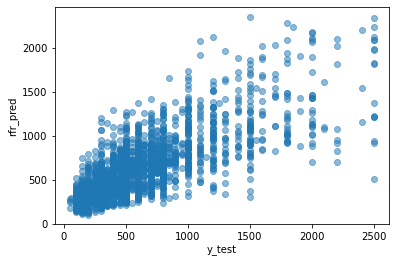

In [72]:
#scatter plot between test data and prediction
plt.scatter(y_test,rfr_pred,alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('rfr_pred')
plt.show()

In [73]:
#now I will create a model with our test data, but 1st I will encode and scale my Test data inputs using minmax scaler

test_new.head()

,CITY,LOCALITY,RATING,VOTES,Title 1,Title 2,C 1,C 2,C 3,C 4,C 5,C 6,C 7,C 8
0,Noida,Sector 18,4.3,564,CASUAL DINING,none,North Indian,Chinese,Mughlai,Kebab,none,none,none,none
1,Mumbai,Grant Road,4.2,61,QUICK BITES,none,South Indian,Fast Food,Pizza,North Indian,none,none,none,none
2,Mumbai,Marine Lines,3.8,350,CASUAL DINING,none,North Indian,Seafood,Biryani,Chinese,none,none,none,none
3,Faridabad,NIT,3.8,1445,None,none,Biryani,none,none,none,none,none,none,none
4,Kochi,Kaloor,3.6,23,QUICK BITES,none,South Indian,Kerala,none,none,none,none,none,none


In [74]:
#Encoding Title1 and Title2
test_new['Title 1'] = le.fit_transform(test_new['Title 1'])
test_new['Title 2'] = le.fit_transform(test_new['Title 2'])

#encoding C 1,C 2,C 3,...C 8
test_new['C 1'] = le.fit_transform(test_new['C 1'])
test_new['C 2'] = le.fit_transform(test_new['C 2'])
test_new['C 3'] = le.fit_transform(test_new['C 3'])
test_new['C 4'] = le.fit_transform(test_new['C 4'])
test_new['C 5'] = le.fit_transform(test_new['C 5'])
test_new['C 6'] = le.fit_transform(test_new['C 6'])
test_new['C 7'] = le.fit_transform(test_new['C 7'])
test_new['C 8'] = le.fit_transform(test_new['C 8'])

#encoding CITY AND LOCALITY
test_new['CITY'] = le.fit_transform(test_new['CITY'])
test_new['LOCALITY'] = le.fit_transform(test_new['LOCALITY'])

In [75]:
test_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4194 entries, 0 to 4230
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   CITY      4194 non-null   int32 
 1   LOCALITY  4194 non-null   int32 
 2   RATING    4194 non-null   object
 3   VOTES     4194 non-null   object
 4   Title 1   4194 non-null   int32 
 5   Title 2   4194 non-null   int32 
 6   C 1       4194 non-null   int32 
 7   C 2       4194 non-null   int32 
 8   C 3       4194 non-null   int32 
 9   C 4       4194 non-null   int32 
 10  C 5       4194 non-null   int32 
 11  C 6       4194 non-null   int32 
 12  C 7       4194 non-null   int32 
 13  C 8       4194 non-null   int32 
dtypes: int32(12), object(2)
memory usage: 294.9+ KB


In [76]:
#we can see that RATING and VOTES column are object type, we will 1st convert them and then look for outliers.

#changing Ratings and Votes into numeric columns
test_new['RATING']=pd.to_numeric(test_new['RATING'])

test_new['VOTES'] = pd.to_numeric(test_new['VOTES'])

In [77]:
#looking for outliers.
z = np.abs(zscore(test_new))

In [78]:
test_after_out =test_new[(z<3).all(axis = 1)]
print('shape after deleting outliers :' , test_after_out.shape)
print('shape before outliers :' , test_new.shape)

shape after deleting outliers : (3704, 14)
shape before outliers : (4194, 14)


In [79]:
#scaling our test data input

test_mms = mms.fit_transform(test_after_out)
test_mms = pd.DataFrame(test_mms)

In [80]:
test_mms.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.733333,0.793976,0.877551,0.201429,0.217391,1.0,0.7250,0.234568,0.7000,0.416667,1.0,1.0,1.0,0.0
1,0.640000,0.265060,0.857143,0.021786,0.956522,1.0,0.8875,0.296296,0.7625,0.683333,1.0,1.0,1.0,0.0
2,0.640000,0.491566,0.775510,0.125000,0.217391,1.0,0.7250,0.851852,0.1625,0.116667,1.0,1.0,1.0,0.0
3,0.273333,0.545783,0.775510,0.516071,0.826087,1.0,0.1250,1.000000,1.0000,1.000000,1.0,1.0,1.0,0.0
4,0.520000,0.359036,0.734694,0.008214,0.956522,1.0,0.8875,0.518519,1.0000,1.000000,1.0,1.0,1.0,0.0


In [81]:
#now our input test data is ready, I will now be creating a Random forest regressor model with train data and test data.


rf = RandomForestRegressor()

train_model = rf.fit(X,Y)

In [82]:
pred_model = rf.predict(test_mms)

In [83]:
pred_model

array([1166. ,  401. , 1061.5, ...,  402. ,  591.5,  355. ])

In [84]:
#saving the predicted file into .csv

fin_res = pd.DataFrame(pred_model)
fin_res.index = test_mms.index # its important for comparison
fin_res.columns = ["prediction"]
fin_res.to_csv("prediction_results.csv")

In [86]:
#saving the model
import joblib
joblib.dump(pred_model,'Restaurant_Cost.pkl')

['Restaurant_Cost.pkl']